[(b'Crookston', b'Glabron', 38.13333, 1931)
 (b'Crookston', b'Manchuria', 39.93333, 1931)
 (b'Crookston', b'No. 457', 45.66667, 1931)
 (b'Crookston', b'No. 462', 48.56666, 1931)
 (b'Crookston', b'No. 475', 44.1    , 1931)
 (b'Crookston', b'Peatland', 41.6    , 1931)
 (b'Crookston', b'Svansota', 40.46667, 1931)
 (b'Crookston', b'Trebi', 46.93333, 1931)
 (b'Crookston', b'Velvet', 41.33333, 1931)
 (b'Crookston', b'Wisconsin No. 38', 49.86667, 1931)
 (b'Duluth', b'Glabron', 29.66667, 1931)
 (b'Duluth', b'Manchuria', 28.96667, 1931)
 (b'Duluth', b'No. 457', 33.6    , 1931)
 (b'Duluth', b'No. 462', 28.1    , 1931)
 (b'Duluth', b'No. 475', 33.06666, 1931)
 (b'Duluth', b'Peatland', 32.     , 1931)
 (b'Duluth', b'Svansota', 25.7    , 1931)
 (b'Duluth', b'Trebi', 33.93333, 1931)
 (b'Duluth', b'Velvet', 26.3    , 1931)
 (b'Duluth', b'Wisconsin No. 38', 31.6    , 1931)
 (b'Grand Rapids', b'Glabron', 29.13333, 1931)
 (b'Grand Rapids', b'Manchuria', 32.96667, 1931)
 (b'Grand Rapids', b'No. 457', 32.

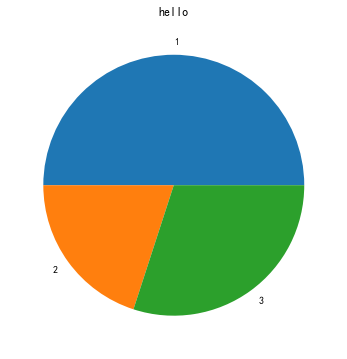

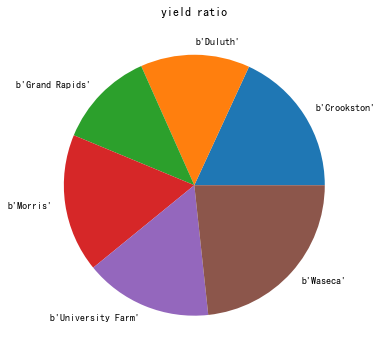

In [83]:
import numpy as np
import matplotlib.pyplot as plt


# 加载数据，保存到数组中
dtype = np.dtype([('Site', 'S20'), ('Variety', 'S20'), ('Yield', 'f4'), ('Year', 'i4')])
data = np.loadtxt('./barley2.csv', dtype=dtype, delimiter=',', skiprows=1)
site, variety, yyield, year = np.loadtxt('./barley2.csv', 
                                         dtype=dtype, 
                                         delimiter=',', 
                                         skiprows=1, 
                                         unpack=True)

# 设置中文显示
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False


def draw_pie(values, title=None, label=None):
    plt.figure(figsize=(6, 6))
    plt.pie(values, labels=label)

    if title:
        plt.title(title)
    plt.show()

draw_pie([0.5, 0.2, 0.3], "hello", ["1", "2", "3"])

# 计算产量占比
yield_ratio = []
yield_sum = np.sum(yyield)
for s in np.unique(site):
    index = np.where(site==s)
    s_sum = np.sum(yyield[index])
    yield_ratio.append(s_sum/yield_sum)

draw_pie(yield_ratio, "yield ratio",np.unique(site))



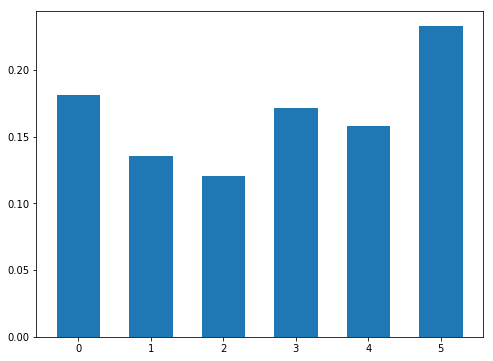

In [20]:
# 柱状图
def draw_bar(x, y, title=None):
    plt.figure(figsize=(8, 6))
    plt.bar(x, y, width=0.6)
    if title: plt.title(title)
    plt.show()

draw_bar(range(0,6), yield_ratio)


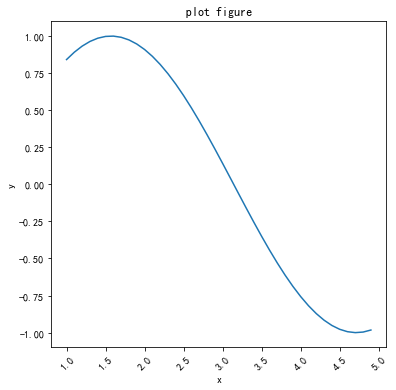

In [75]:
# plot
def draw_plot(x, y, title=None):
    plt.figure(figsize=(6, 6))
    plt.plot(x, y)
    if title: plt.title(title)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.xticks(rotation=45)
    plt.show()
x = np.arange(1, 5, 0.1)
draw_plot(x, np.sin(x), "plot figure")

In [79]:
# 散点图
def draw_scatter(x, y, title=None):
    plt.figure(figsize=(6,6))
    plt.scatter(x, y)
    if title: plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

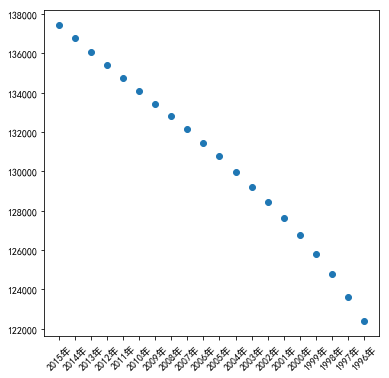

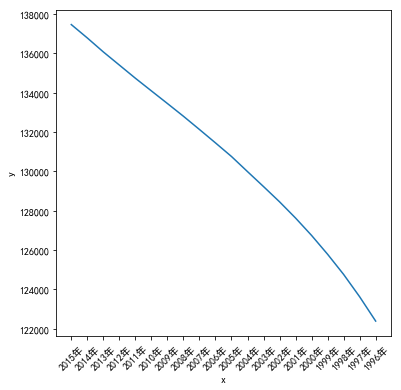

In [80]:
# 课后习题
data = np.load('./populations.npz')
values = data.f.data
names = data.f.feature_names
# 剔除异常数据
values = values[0:len(values)-2, :]
#print(values)
draw_scatter(values[:, 0], values[:, 1])
draw_plot(values[:, 0], values[:, 1])

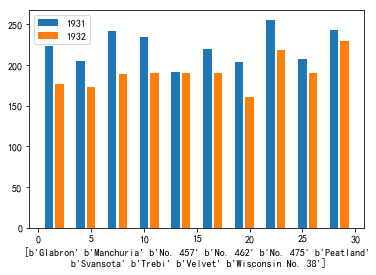

In [127]:
yield_virety_1931 = []
yield_virety_1932 = []
for v in np.unique(variety):
    index_variety = np.where(variety==v)[0]
    index_year_1931 = np.where(year==1931)[0]
    index_year_1932 = np.where(year==1932)[0]
    temp_1931 = []
    temp_1932 = []
    for index in index_variety:
        #print(i)
        if index in index_year_1931:
            temp_1931.append(index)
        elif index in index_year_1932:
            temp_1932.append(index)
    yield_virety_1931.append(np.sum(yyield[temp_1931]))
    yield_virety_1932.append(np.sum(yyield[temp_1932]))
    
#print(yield_virety_1931)
#print(yield_virety_1932)
x = np.arange(1,len(np.unique(variety))*3,3)
x1 = x+1
plt.bar(x, yield_virety_1931)
plt.bar(x1, yield_virety_1932)
plt.legend(['1931', '1932'])
plt.xlabel(np.unique(variety))
plt.show()
